# Day 13: Advanced Techniques for Handling Missing Data in Python

## Objective
 - Deepen understanding of handling missing data using Python, focusing on various imputation techniques, best practices, and integrating statistical tests from R for data analysis.

## Prerequisites
- Intermediate skills in Python, Pandas, NumPy, and Scikit-Learn.
- Basic understanding of statistical methods.
- Python environment with necessary libraries and R integration using `rpy2`.
- Dataset: https://github.com/100daysofml/100daysofml.github.io/blob/main/content/Week_03/titanic.csv

## Understanding Missing Data

### Types of Missing Data
1. **Missing Completely at Random (MCAR)**: No relationship with any other data.
2. **Missing at Random (MAR)**: Missingness related to observed data.
3. **Missing Not at Random (MNAR)**: Missingness related to unobserved data.

## Step 1: Load and Explore the Dataset


```python
import pandas as pd

titanic_data = pd.read_csv('titanic.csv')

print(titanic_data.head())
print(titanic_data.isnull().sum())
```

In [13]:
import pandas as pd

titanic_data_original = pd.read_csv('titanic.csv')

titanic_data = pd.read_csv('titanic.csv')

print(titanic_data.head())
print(titanic_data.isnull().sum())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Par

## Step 2: Basic Imputation Techniques

-   **Mean/Median Imputation**:
    -   **Use when**: Data is MCAR and normally distributed.
    -   **Best Practice**: Use median for skewed data.
    -   **Python Code**:

### Filling Age with Median

```python
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

```

Filling missing data is an important step in preparing a dataset for analysis or model training. The choice of imputation technique depends on the nature of the data and the specific column with missing values. Let's break down the rationale behind the provided code:
Filling Age with Median

-   **Why Use Median for Age**:
    -   **Robust to Outliers**: The median is less sensitive to outliers compared to the mean. In datasets where age might have extreme values or a skewed distribution, using the median ensures that the imputed values are not unduly influenced by these extremes.
    -   **Dealing with MCAR or MAR**: If the missingness in the 'Age' column is MCAR (Missing Completely at Random) or MAR (Missing at Random), median imputation provides a reasonable estimate that preserves the central tendency of the data.

-   **Mode Imputation**:
    -   **Use when**: Best for categorical data..

```python

embarked_mode = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

```
-   **Why Use Mode for Embarked**:
    -   **Categorical Data**: 'Embarked' is a categorical variable (representing different embarkation points). For categorical data, mean and median are not applicable. The mode, which is the most frequently occurring category, is a natural choice for imputation.
    -   **Preserving the Most Common Category**: By using the mode, you maintain the original distribution of the data as closely as possible. It ensures that the statistical and structural integrity of the 'Embarked' column is maintained post-imputation.
    -   **Handling MCAR/MAR**: If the data is MCAR or MAR, replacing missing values with the most common category (mode) helps to retain the representativeness of the dataset.
    
### General Best Practices

-   **No Distortion of Original Distribution**: The goal is to impute missing values in a way that the overall distribution and relationships in the data remain as unaffected as possible.
-   **Contextual Decision Making**: The choice of imputation method should also consider the context and importance of the variable in the dataset. For instance, if a variable like 'Embarked' is crucial for the analysis or model, careful consideration is needed to choose the most appropriate imputation method that reflects the real-world scenario.

In conclusion, the choice of median for 'Age' and mode for 'Embarked' is driven by the nature of these variables (continuous vs. categorical) and the goal of preserving the original data distribution while responsibly handling missing values.    

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
embarked_mode = titanic_data['Embarked'].mode()[0]

print(embarked_mode)

titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

S


## Step 3: Advanced Imputation Techniques

-   **KNN Imputation**:
    -   **Use when**: Data has identifiable patterns.

```python
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])
titanic_data[numeric_columns.columns] = imputer.fit_transform(numeric_columns)
```
### How and Why to Use KNN Imputation

-   **Mechanism**: K-Nearest Neighbors (KNN) Imputation works by finding the 'k' closest neighbors to a data point with missing values and then imputes those values based on the non-missing values of these neighbors.
-   **Applicability**: This method is particularly useful when the data exhibits a pattern or relationship, such as in cases where similar observations have similar types of values.
-   **Choosing 'k'**: The choice of 'k' (number of neighbors) is crucial. A smaller 'k' might capture more variance in the data, while a larger 'k' can smooth out the noise but might lead to bias.
-   **Distance Metric**: KNN uses a distance metric (like Euclidean distance) to find the closest neighbors. The choice of the distance metric can significantly impact the imputation.

### Best Practices for KNN Imputation

-   **Standardize Data**: KNN is sensitive to the scale of data, so it's often recommended to standardize data before using KNN imputation.
-   **Handle Outliers**: Outliers can skew the distance metric, leading to inaccurate imputation. Handling outliers before imputation can be beneficial.
-   **Consider Computational Cost**: KNN can be computationally expensive, especially for large datasets with many missing values.

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])
titanic_data[numeric_columns.columns] = imputer.fit_transform(numeric_columns)

### Regression Imputation:

-   **Use when**: The missingness is MAR (Missing at Random) and can be predicted using other variables in the dataset.

### How to Implement Regression Imputation

-   **Principle**: This technique involves using regression models to predict the missing values based on other, related variables.
-   **Steps**:
    1.  Develop a regression model using variables that do not have missing values as predictors.
    2.  Use this model to predict the missing values in the target variable.
-   **Python Code**: Specific implementation depends on the dataset and choice of regression model (e.g., Linear Regression, Logistic Regression).

### Best Practices for Regression Imputation

-   **Avoid Using Imputed Variable as a Predictor**: Do not use the variable for which values are imputed as a predictor in the same model to avoid introducing bias.
-   **Model Selection**: The choice of regression model should be based on the nature of the data and the relationship between variables.
-   **Evaluate Model Fit**: Ensure the regression model adequately fits the data. Poorly fitted models can lead to inaccurate imputations.
-   **Multiple Imputation Consideration**: For more robust results, consider multiple imputation, where the process is repeated multiple times, and the results are averaged.

## Step 4: Handling MNAR Data (Missing Not at Random)

### Approach

When dealing with Missing Not at Random (MNAR) data, the missingness is related to the unobserved data itself. This type of missing data requires more sophisticated approaches, such as data augmentation or model-based methods.

### Data Augmentation Methods

-   **Principle**: Data augmentation involves artificially creating data points based on the characteristics of the existing dataset.
-   **Usage**: It can be used when the pattern of missingness provides information that can be modeled.

### Model-Based Methods

-   **Principle**: These methods involve building statistical models that directly account for the mechanism of missingness.
-   **Usage**: Commonly used in scenarios where the reasons for missingness are complex and intertwined with the unobserved values.

### Example Code: Handling MNAR Data Using Model-Based Approach

```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.linear_model import BayesianRidge

#Using Iterative Imputer with BayesianRidge estimator
iterative_imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, random_state=0)

#Assuming 'titanic_data' has some MNAR data
titanic_data_imputed = iterative_imputer.fit_transform(titanic_data)

#Replace original data with imputed data
titanic_data = pd.DataFrame(titanic_data_imputed, columns=titanic_data.columns)
```

In [21]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# import numpy as np
# from sklearn.linear_model import BayesianRidge

# # Using Iterative Imputer with BayesianRidge estimator
# iterative_imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, random_state=0)

# # Assuming 'titanic_data' has some MNAR data
# titanic_data_imputed = iterative_imputer.fit_transform(titanic_data)

# # Replace original data with imputed data
# titanic_data = pd.DataFrame(titanic_data_imputed, columns=titanic_data.columns)

### Best Practices for Handling MNAR Data

-   **Model Selection**: The choice of the model should align with the assumed mechanism of missingness. For instance, Bayesian models can incorporate prior beliefs about the missingness.
-   **Multiple Imputation**: It's often recommended to use multiple imputation techniques, which involve creating several imputed datasets and combining the results, to account for the uncertainty in the imputation process.
-   **Domain Knowledge**: Integrating domain knowledge is crucial to understand and model the reasons behind the missingness effectively.
-   **Sensitivity Analysis**: After imputation, performing a sensitivity analysis to understand how different assumptions about the missing data mechanism affect the results can provide insights into the robustness of the conclusions.

### Formulas and Statistical Models

-   **Bayesian Models**: Bayesian models, like Bayesian Ridge Regression used in the example, combine prior distributions (beliefs about the data before observing it) with the likelihood of the observed data to estimate the posterior distribution of the model parameters.
-   **Iterative Imputer Formula**: The Iterative Imputer, in its essence, uses a round-robin approach, modeling each feature with missing values as a function of other features in a round-robin or chained fashion.

## Step 5: Evaluating the Impact of Imputation

### Objective

To assess how different imputation methods affect the distribution and overall quality of the dataset. Visualization plays a key role in this evaluation.

### Python Visualization Techniques

The primary goal of visualization in this context is to compare the distribution of data before and after imputation to gauge the impact of the imputation technique.

### Using Histograms

-   **Purpose**: To visualize the frequency distribution of continuous variables.
-   **When to Use**: Ideal for assessing the impact on variables like 'Age' where you're interested in understanding the spread and central tendency.

### Using Scatter Plots

-   **Purpose**: To observe the relationship between two continuous variables.
-   **When to Use**: Useful to examine if relationships between variables are preserved post-imputation.

### Example Code for Visualization

#### Histogram for 'Age'


```python
import matplotlib.pyplot as plt

#Histogram of 'Age' before imputation
plt.hist(titanic_data_original['Age'].dropna(), bins=20, alpha=0.5, color='blue', label='Original')
#Histogram of 'Age' after imputation
plt.hist(titanic_data_imputed['Age'], bins=20, alpha=0.5, color='green', label='Imputed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution: Original vs. Imputed')
plt.legend()
plt.show()
```

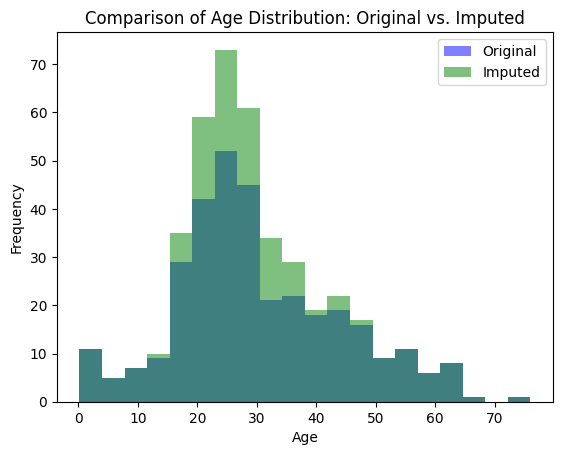

In [22]:
import matplotlib.pyplot as plt

# Histogram of 'Age' before imputation
plt.hist(titanic_data_original['Age'].dropna(), bins=20, alpha=0.5, color='blue', label='Original')
# Histogram of 'Age' after imputation
plt.hist(titanic_data['Age'], bins=20, alpha=0.5, color='green', label='Imputed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution: Original vs. Imputed')
plt.legend()
plt.show()

#### Scatter Plot for Two Variables

```python
#Scatter plot to compare relationships - Example with 'Age' and 'Fare'
plt.scatter(titanic_data_original['Age'], titanic_data_original['Fare'], alpha=0.5, label='Original')
plt.scatter(titanic_data_imputed['Age'], titanic_data_imputed['Fare'], alpha=0.5, label='Imputed')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare: Original vs. Imputed')
plt.legend()
plt.show()
```

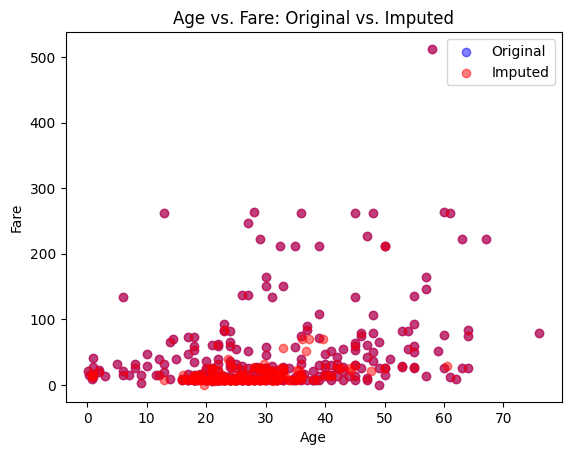

In [31]:
# Scatter plot to compare relationships - Example with 'Age' and 'Fare'
plt.scatter(titanic_data_original['Age'], titanic_data_original['Fare'], alpha=0.5, c='b', label='Original')
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5, c='r', label='Imputed')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare: Original vs. Imputed')
plt.legend()
plt.show()

### Best Practices for Evaluating Imputation

-   **Compare Distributions**: Always compare the distributions before and after imputation to ensure that the imputation method hasn't significantly altered the data's structure.
-   **Look for Anomalies**: After imputation, be on the lookout for any unusual patterns such as spikes in the data which weren't there originally.
-   **Consistency in Relationships**: Ensure that the relationships between variables remain consistent post-imputation.

## Step 6: Homework Assignment

- Task: Apply techniques to "Titanic" dataset from Kaggle.
- Report: Analyze the effectiveness and impact of each technique on the dataset and model performance.

## Best Practices and Considerations

-   **Preventing Data Leakage**: Split dataset before imputation.
-   **Choosing the Right Method**: Analyze missingness type.
-   **Avoid Overfitting**: Be cautious with complex methods.
-   **Documenting Changes**: Keep track of changes for transparency.
-   **Impact Assessment**: Evaluate how

## Testing Data

## Integrating Little's MCAR Test Using rpy2

### Setting Up rpy2
```python
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, globalenv

base = importr("base")
utils = importr("utils")

utils.chooseCRANmirror(ind=1)
pandas2ri.activate()

# Enable R magic in Jupyter
%load_ext rpy2.ipython
```

## Installing R Packages

```python
utils.install_packages("remotes")
%R remotes::install_github("njtierney/naniar")
%R library(naniar)
```

## Performing Little's MCAR Test

```python
globalenv["r_df"] = titanic_data
%R mcar_test(r_df)
```

## Practical Tips for Discerning Missing Data Types

-   **MCAR**: Use statistical tests and consistency checks across variables.
-   **MAR vs. MNAR**: Requires domain knowledge and statistical analyses (e.g., using classifiers to predict missingness).
-   **Consult Experts**: Especially for MNAR, expert insights are invaluable.

### **Additional Resources (Train/Test Splitting | Data Leakage)**

https://www.simplilearn.com/data-imputation-article

https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/

https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

https://dataaspirant.com/data-imputation-techniques/